<a href="https://colab.research.google.com/github/vishant750/cardiovascular_risk_prediction/blob/main/cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title - Cardiovascular Risk Prediction**

## Project Type - Classification
## Contribution - Individual
## Individual Name - Vishant Kumar

# **Github Link**


https://github.com/vishant750/cardiovascular_risk_prediction/blob/main/cardiovascular_risk_prediction.ipynb

# **Problem Description**

##Cardiovascular study on residents of the town of Fromingham,Massachusetts is given the aim of this classification project is to predict whether the patient has a 10-year risk of future coronary heart disease(CHD). The dataset provides the patients information. It includes over 4000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic behavioral and medical risk factors.

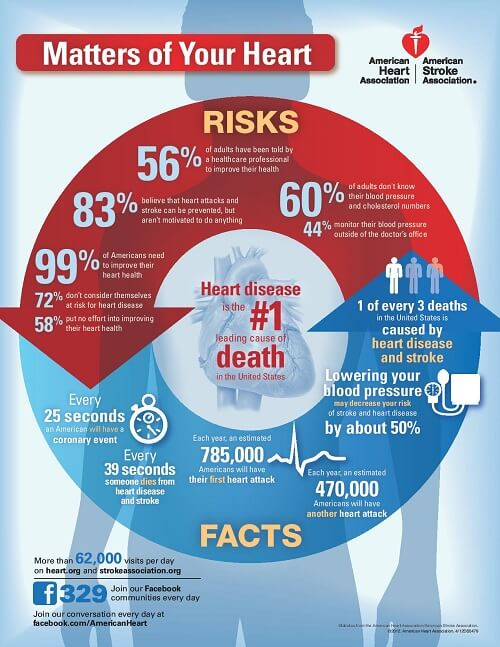

# **Data Description**

## The dataset contains potential cardiovascular attributes.The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. 


## Attributes Information-



## 1.   Sex - gender
## 2.   Age - age of the individual
## 3.   is_smoking - whether the individual is smoking or not
## 4.   Cigs_per_day - the number of cigarettes that the person smoked on average in one day.
## 5.   BP_Meds - whether or not the patient was on blood pressure medication
## 6.   Prevalent Stroke - whether or not the patient had previously had a stroke 
## 7.   Prevalent Hyp - whether or not the patient was hypertensive 
## 8.   Diabetes - whether or not the patient had diabetes
## 9.   Tot Chol - total cholesterol level 
## 10.  Sys BP - systolic blood pressure
## 11.  Dia BP -diastolic blood pressure
## 12.  BMI - Body Mass Index
## 13.  Heart Rate - heart rate
## 14.  Glucose - glucose level
## 15.  TenYearCHD-10-year risk of coronary heart disease CHD


# **Initial preparation**

In [ ]:
#Importing the dependencies
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
##Loading the data
cardiovascular_risk_pred=pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv',index_col='id')

# **EDA**

In [ ]:
#First 5 observation
cardiovascular_risk_pred

In [ ]:
#Last 5 observations
cardiovascular_risk_pred.tail()

In [ ]:
#Shape of the dataset
cardiovascular_risk_pred.shape

We have 3,390 observations and 16 columns

In [ ]:
#Columns
cardiovascular_risk_pred.columns

In [ ]:
#Summary of the dataframe
cardiovascular_risk_pred.info()

In [ ]:
#Statistical summary of dataframe
cardiovascular_risk_pred.describe()

In [ ]:
#Checking the target variable
cardiovascular_risk_pred['TenYearCHD'].value_counts()

## Which age group is most likely to have a higher CHD risk factor.


In [ ]:
#Count for TenYearCHD vs age 
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x=cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['age'],color='aquamarine')
plt.ylabel('TenYearCHD')

### The age group at most risk to have positive CHD risk factor is 47 to 65.

## Does the education level affect the ten year CVD risk factor

In [ ]:
#Count for TenYearCHD vs age 
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x='education',color='aquamarine',hue='TenYearCHD')
plt.legend(["No Risk", "Risk"])
plt.ylabel('TenYearCHD')

### We can see that most number of 'At risk' cases are 1st level of education and least number of 'At risk' cases are 4th level.This is misleading result.

### What sex is most likely to suffer from high CHD

In [ ]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['sex'].value_counts()

In [ ]:
#Count for TenYearCHD vs sex
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x=cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['sex'],color='aquamarine')
plt.ylabel('TenYearCHD')

### We can see that there is there is a 14% more chances of higher TenYearCHD in males according to the given dataset.

## Effect of smoking on CHD

In [ ]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['is_smoking'].value_counts()

In [ ]:
#Count for TenYearCHD vs sex
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x=cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['is_smoking'],color='aquamarine')
plt.ylabel('TenYearCHD')

### We can see that there is a 17% more chances in CHD risk for smoking individuals. 

## Blood pressure medication affect on CHD risk factor

In [ ]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['BPMeds'].value_counts()

In [ ]:
#Count for TenYearCHD vs BPMeds 
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x=cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['BPMeds'],color='aquamarine')
plt.ylabel('TenYearCHD')
plt.title('Distribution of positive case over different categories of BPMeds')

### We can see that people who are taking BP medication have 7% higher chances for greater TenYearCHD.

## Does previous strokes affect future CHD risk?

In [ ]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['prevalentStroke'].value_counts()

In [ ]:
#Count for TenYearCHD vs prevalentStroke
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x=cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['prevalentStroke'],color='aquamarine')
plt.ylabel('TenYearCHD')
plt.title('Distribution of positive case over different categories of prevalentStroke')

### We can see that people with previous stroke are having 2% higher TenYearCHD

## Does hypertention affect the chances of higher TenYearCHD?

In [ ]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['prevalentHyp'].value_counts()

In [ ]:
#Count for TenYearCHD vs prevalentHyp	
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x=cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['prevalentHyp'],color='aquamarine')
plt.ylabel('TenYearCHD')
plt.title('Distribution of positive case over different categories of prevalentHyp')

### We can see that hypertension increases the chances of TenYearCHD by 0.2%.

## Effect of Diabeties on TenYearCHD

In [ ]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['diabetes'].value_counts()

In [ ]:
#Count for TenYearCHD vs diabetes	
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x=cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['diabetes'],color='aquamarine')
plt.ylabel('TenYearCHD')
plt.title('Distribution of positive case over different categories of diabetes')

### We can see that there is 6% higher TenYearCHD for individuals with diabetes.

# **Lineplots for the continious variables totChol,sysBP,diaBP,BMI,heartRate,glucose for positive cases of TenYearCHD**

In [ ]:
continious_variable_med_list = ['totChol','sysBP','diaBP','BMI','heartRate','glucose']
for index,value in enumerate(continious_variable_med_list):
  plt.figure(figsize=(20,12))
  plt.subplot(2,3,index+1)
  temp=data=cardiovascular_risk_pred.groupby(value)['TenYearCHD'].sum().reset_index()
  sns.lineplot(data=temp,x=value,y='TenYearCHD')

## **From the visualisations we can see that for all these variables, most of the positive cases are for the medium range, this is because the dataset mostly contains people with medium ranges for these variables. In theory, consistent high and low values for all these variables are dangerous and can have an increasing effect on the CHD risk factor.**

## **The medium ranges for all these variables according to our data are:**

* Total cholestrol: 170-310
* Systolic blood pressure: 100-180
* Diastolic blood pressure: 70-100
* BMI: 20-32
*cHeart rate: 60-95
* Glucose: 50-110

# **Data Cleaning**

## **Handling Null Values**


###Missing data is are values or data which has not been stored in the given dataset.

###Missing values can bais the results of the machine learning models or reduce the accuracy of the model.

### Therefore it is essential to remove null values from the dataset before training the model.

In [ ]:
#Checking for null values
cardiovascular_risk_pred.info()

In [ ]:
cardiovascular_risk_pred.isnull().sum()

### Since the glucose column has a lot of null values, I'll impute them with the mean glucose value. After this, the number of null values present will be of a very small order when compared to the size of the dataset, therefore I'll just delete them.

In [ ]:
#Impluting mean value of glucose in null values of glucose
mean_glucose=int(cardiovascular_risk_pred['glucose'].mean())
cardiovascular_risk_pred['glucose'].fillna(mean_glucose,inplace=True)

In [ ]:
#Deleting rest of the null values
cardiovascular_risk_pred.dropna(inplace=True)

In [ ]:
#Checking for null values
cardiovascular_risk_pred.isnull().sum()

### There are no null values, hence we can move forward

## **Handling Dulicate values**

In [ ]:
cardiovascular_risk_pred.duplicated().sum()

### We can see that there are no duplicated values, so we can move ahead.

# **Handling outliers**

In [ ]:
#Creating a list of numerical values that can have outliers
possible_outliers_columns= ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [ ]:
for index, value in enumerate(possible_outliers_columns):
  plt.figure(figsize=(20,10))
  plt.subplot(2,4,index+1)
  plt.boxplot(cardiovascular_risk_pred[value])
  plt.title(str(value))


### From the boxplot we can see that there are outliers in the data, but practically speaking even though they are not "normal" observations, they are still possible. Ruling out such possible scenerios can be harmful for our prediction.
### Therefore not removing outliers.

# **Feature Engineering**



## **Feature Encoding**
###Machine learning model only works with numerical values and hence important categorical values are converted into numerical variables.
###Here we have two columns that require encoding and they are "sex" and "is_smoking".

In [ ]:
#Encoding for sex column
cardiovascular_risk_pred['sex']=cardiovascular_risk_pred['sex'].apply(lambda x: 1 if x=='M' else 0)
#Encoding for is_smoking column
cardiovascular_risk_pred['is_smoking']=cardiovascular_risk_pred['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [ ]:
#Checking the encoding
cardiovascular_risk_pred.head()

## **Grouping columns for better understanding**

###There are many columns in this dataset. Some of them can be combined to give a better column which actually gives out better and precise information, which would also impact the prediction in a positive way.

## **SmokeLevel**
###At first we can combine the is_smoking and cigsPerDay column. If a person has cigsPerDay value as something greater than 0, then it obviously means he is a smoker. In that case the column is_smoking would be of no value.

###Now I will combine both of these columns into a single column which would be an ordinal column called SmokeLevel that contains the level of smoking for each person.



In [ ]:
#defining smoker function to return the smoking level for the individual
def smoke_level(cpd):
  if cpd==0:                    #Non smoker
    return 1
  elif cpd>0 and cpd<=10:       #Smoker with more than 0 and less than 10 cigs per day
    return 2
  elif cpd>10 and cpd<=20:      #Smoker with more than 10 and less than 20 cigs per day 
    return 3
  elif cpd>20 and cpd<=30:      #Smoker with more than 20 and less than 30 cigs per day
    return 4
  elif cpd>30 and cpd<=40:      #Smoker with more than 30 and less than 40 cigs per day
    return 5        
  else:                         #Smoker with more than 40 cigs per day
    return 6  

In [ ]:
cardiovascular_risk_pred['Smokelevel']=cardiovascular_risk_pred['cigsPerDay'].apply(lambda x: smoke_level(x))

In [ ]:
#Removing the is_smoking and cigPerDay
cardiovascular_risk_pred.drop(columns=['is_smoking','cigsPerDay'],inplace=True)

In [ ]:
cardiovascular_risk_pred

## **BPLevel**
### Next I will combine 'sysBP' and 'diaBP' to create a new columns called BP level.
### The image below explains how BP level is defined

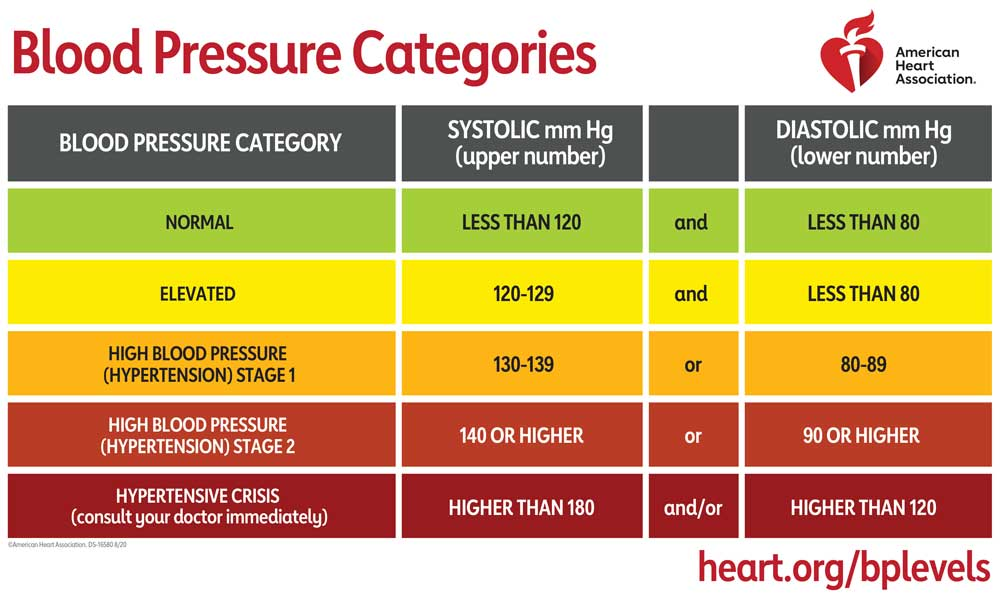

In [ ]:
#A function that returns the Blood Pressure level by taking the Systolic blood pressure and Diastolic blood pressure as inputs
def BPlevel(s,d):
  if s<120 or d<80:                               #Normal level
    return 1
  elif (s>=120 and s<130) or d<80:                #Elevated level
    return 2
  elif (s>129 and s<140) or (d>79 and d<90):       #High BP stage 1
    return 3
  elif (s>139 and s<180) or (d<89 and d<120):      #High BP stage 2
    return 4
  elif s>179 or d>119:                             #Hypertensive crisis
    return 5                    

In [ ]:
#Creating BPlevel column
cardiovascular_risk_pred['BPlevel']=cardiovascular_risk_pred.apply(lambda x: BPlevel(x['sysBP'],x['diaBP']),axis=1)

In [ ]:
#droping the sysBP and diaBP columns
cardiovascular_risk_pred.drop(columns=['sysBP','diaBP'],axis=1,inplace=True)

In [ ]:
#Checking for new columns
cardiovascular_risk_pred.head()

## **DiabetesLevel**
### Atlast, I'll convert the "glucose" column to a column called "DiabetesLevel". This would enable us to remove the glucose column and the diabetes column.

###The below image shows how glucose relate to diabetes level

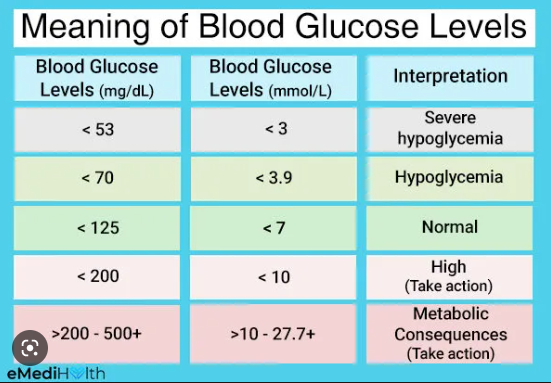

In [ ]:
def diabetes(g):
  if g <53:                               #Severe Hypoglycemia
    return 1
  elif g>53 and g<70:                     #Hypoglycemia
    return 2
  elif g>70 and g<125:                    #Normal
    return 3
  elif g>125 and g<200:                   #Pre-Diabetic
    return 4
  elif g>200:                             #Severe-Diabetes
    return 5

In [ ]:
#Creating a diabetic level
cardiovascular_risk_pred['DiabetesLevel']=cardiovascular_risk_pred['glucose'].apply(lambda x: diabetes(x))

In [ ]:
#Removing columns diabetes and glucose
cardiovascular_risk_pred.drop(columns=['diabetes','glucose'],axis=1,inplace=True)

In [ ]:
#Checking the columns
cardiovascular_risk_pred.head()

##**Feature Removal**

##Checking for Correlation

In [ ]:
#plotting correlation matrix using heatmap plot
plt.figure(figsize=(15,10))
sns.heatmap(cardiovascular_risk_pred.corr(),annot=True,cmap='Spectral')

### We can see that there in no high correlation in our data. But we can see that there is a high correlation between prevalentHyp and BPlevel.
### Dropping the BPlevel.

In [ ]:
#Removing the BPlevel
cardiovascular_risk_pred.drop('prevalentHyp',axis=1,inplace=True)

# **Pre Processing of data**

## **Dealing with class imbalance**
###A dataset is imbalanced if the classification categories are not approximately equally represented. This affects the quality of our machine larning model and also causes a mistake of classifying the minority class as the majority class. Therefore we will try to deal with this class imbalance if it exists in our dataset.

In [ ]:
#Checking for class imbalance for the target variable
cardiovascular_risk_pred['TenYearCHD'].value_counts()

###We can see that there is high class imbalance 
###Technique for resolve class imbalance-


### 1.Resampling(undersampling and oversampling)  
### 2.SMOTE
### 3.Using BalancedBaggingClassifier
###In this project I will be using SMOTE technique(synthetic minority oversampling technique)



## **SMOTE**

### Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases

In [ ]:
#Dropping the Nan values after grouping
cardiovascular_risk_pred.dropna(inplace=True)
#Creating the dataset for independent and dependent data
x=cardiovascular_risk_pred.drop('TenYearCHD',axis=1)
y=cardiovascular_risk_pred['TenYearCHD']

In [ ]:
#Droping eduction and id from y since it has no significance
x.reset_index(inplace=True)
x.drop(columns={'id','education'},inplace=True)

In [ ]:
#Applying the smote technique to solve class imbalance
smote = SMOTE(sampling_strategy='minority')
x_sm , y_sm = smote.fit_resample(x,y)

In [ ]:
#Checking for improvement in class imbalance after using SMOTE technique
y_sm.value_counts()

### As we can see, the class imbalance has been completely removed.

## **Splitting the data**

In [ ]:
#Splitting the data
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.25,random_state=0)

##**Feature Scaling**

### Feature engineering is a technique to standardize the independent feature preset in the dataset.It is performed in feature engineering during pre-processing to handle highly varying magnitude or values or units.If feature scaling is not done higher values are given more importance and lower value are given lower value regardless of units.
###Ways to feature scale:
### * Min max normalization
### * Standardisation
###Using StandartScaler() function for this project.

In [ ]:
#Creating object for the StandardScaler function
scaler = StandardScaler()

In [ ]:
#Standardizing the dataset
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
#Overview of standardize dataset
x_train

# **Model Implementation**

###Machine learning models can be described as programs that are trained to find patterns or trends within data and predict the result for new data.

###In this project we are dealing with a classification problem, therefore we will be using classification models. 
###In this project we will be including the following models:

###1.Logistic regression.
### 2.Decision tree classifier.
### 3.Random forest classifier.

## **Logistic Regression**

In [ ]:
#Logistic Regression object
logistic_regression=LogisticRegression(fit_intercept=True,max_iter=1000)

In [ ]:
#Finding the best parameters for Logistic regression using GridSearCV
parameters={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50]}
logistic_regression_gridsearch=GridSearchCV(logistic_regression,param_grid=parameters,scoring='roc_auc')

In [ ]:
#Training logistic regression model with training data
logistic_regression_gridsearch.fit(x_train,y_train)

In [ ]:
#Finding the Best Parameters for the Logistic Regression
logistic_regression_gridsearch.best_params_

In [ ]:
#predicting the dependent variable using the x_train data
y_pred_logistic_train=logistic_regression_gridsearch.predict(x_train)

In [ ]:
#Confusion martix for train data
confusion_matrix_train=confusion_matrix(y_train,y_pred_logistic_train)
confusion_matrix_train

In [ ]:
#Confusion matrix visualization on train data
#labels for the prediction
labels = ['No Risk', 'At Risk']
ax=plt.subplot()
sns.heatmap(pd.DataFrame(confusion_matrix_train),annot=True,cmap='Spectral',ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No Risk', 'Risk'])
ax.yaxis.set_ticklabels(['No Risk', 'Risk'])
plt.title('Confusion Matrix for Test data')


In [ ]:
#ROCAUC score for the train data
score_train = roc_auc_score(y_train,y_pred_logistic_train)          #Calculating the ROCAUC score
print('\nThe ROCAUC score is ',score_train, 'and the classification report is shown below:')

In [ ]:
#Classification Report data visualization for train data
sns.heatmap(pd.DataFrame(classification_report(y_pred_logistic_train,y_train,output_dict=True,target_names = ['No Risk', 'At Risk'])).iloc[:-1, :].T,annot=True,cmap='Spectral')
plt.title('Classification report on Logistic Regression on train data')

## Checking the test data

In [ ]:
#predicting the dependent variable using the x_test data
y_pred_logistic_test=logistic_regression_gridsearch.predict(x_test)

In [ ]:
#Confusion martix for test data
confusion_matrix_test=confusion_matrix(y_test,y_pred_logistic_test)
confusion_matrix_test

In [ ]:
#Confusion matrix visualization on test data
#labels for the prediction
labels = ['No Risk', 'At Risk']
ax=plt.subplot()
sns.heatmap(pd.DataFrame(confusion_matrix_test),annot=True,cmap='Spectral',ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No Risk', 'Risk'])
ax.yaxis.set_ticklabels(['No Risk', 'Risk'])
plt.title('Confusion Matrix for Test data')


In [ ]:
#ROCAUC score for the test data
score_train = roc_auc_score(y_test,y_pred_logistic_test)          #Calculating the ROCAUC score
print('\nThe ROCAUC score is ',score_train, 'and the classification report is shown below:')
  

In [ ]:
#Classification Report data visualization for test data
sns.heatmap(pd.DataFrame(classification_report(y_pred_logistic_test,y_test,output_dict=True,target_names = ['No Risk', 'At Risk'])).iloc[:-1, :].T,annot=True,cmap='Spectral')
plt.title('Classification report on Logistic Regression on test data')

##**Decision Tree classifier**

In [ ]:
#Creating Decision tree object
treemodel=DecisionTreeClassifier()

In [ ]:
#Parameters for decisiontree
parameters_decisontree={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
    
}

In [ ]:
#GridSearchCV for decision tree
tree_grid=GridSearchCV(treemodel,param_grid=parameters_decisontree,cv=5,scoring='roc_auc')

In [ ]:
#Fitting training dataset
tree_grid.fit(x_train,y_train)

In [ ]:
#Best Parametes for decision tree
tree_grid.best_params_

## Decision Tree prediction on test data

In [ ]:
#predicting the dependent variable using the x_train data
y_pred_tree_train=tree_grid.predict(x_train)

In [ ]:
#Confusion martix for test data
confusion_matrix_train=confusion_matrix(y_train,y_pred_tree_train)
confusion_matrix_train

In [ ]:
#Confusion matrix visualization on test data
#labels for the prediction
labels = ['No Risk', 'At Risk']
ax=plt.subplot()
sns.heatmap(pd.DataFrame(confusion_matrix_train),annot=True,cmap='Spectral',ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No Risk', 'Risk'])
ax.yaxis.set_ticklabels(['No Risk', 'Risk'])
plt.title('Confusion Matrix for Train data')


In [ ]:
#ROCAUC score for the train data
score_train = roc_auc_score(y_train,y_pred_tree_train)          #Calculating the ROCAUC score
print('\nThe ROCAUC score is ',score_train, 'and the classification report is shown below:')
  

In [ ]:
#Classification Report data visualization for train data
sns.heatmap(pd.DataFrame(classification_report(y_pred_tree_train,y_train,output_dict=True,target_names = ['No Risk', 'At Risk'])).iloc[:-1, :].T,annot=True,cmap='Spectral')
plt.title('Classification report on Logistic Regression on train data')

## Decision Tree prediction on test data

In [ ]:
#predicting the dependent variable using the x_test data
y_pred_tree_test=tree_grid.predict(x_test)

In [ ]:
#Confusion martix for test data
confusion_matrix_test=confusion_matrix(y_test,y_pred_tree_test)
confusion_matrix_test

In [ ]:
#Confusion matrix visualization on test data
#labels for the prediction
labels = ['No Risk', 'At Risk']
ax=plt.subplot()
sns.heatmap(pd.DataFrame(confusion_matrix_test),annot=True,cmap='Spectral',ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No Risk', 'Risk'])
ax.yaxis.set_ticklabels(['No Risk', 'Risk'])
plt.title('Confusion Matrix for Test data')


In [ ]:
#ROCAUC score for the test data
score_train = roc_auc_score(y_test,y_pred_tree_test)          #Calculating the ROCAUC score
print('\nThe ROCAUC score is ',score_train, 'and the classification report is shown below:')
  

In [ ]:
#Classification Report data visualization for test data
sns.heatmap(pd.DataFrame(classification_report(y_pred_tree_test,y_test,output_dict=True,target_names = ['No Risk', 'At Risk'])).iloc[:-1, :].T,annot=True,cmap='Spectral')
plt.title('Classification report on Logistic Regression on test data')

# **Random Forest Classifier**

### A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
#Creating Random forest classifier object
random_forest_classifier=RandomForestClassifier()

In [ ]:
#Parameters for Random forest classifier
parameters_randomforest={
    'criterion':['gini','entropy','log_loss'],
    'n_estimators':[50, 65, 80, 95,120],
    'max_depth':[3,5,7,9,10],
    'max_features':['auto','sqrt','log2']
    
}

In [ ]:
#GridSearchCV for Random Forest Classifier
randomforest_grid=GridSearchCV(random_forest_classifier,param_grid=parameters_randomforest,cv=5,scoring='roc_auc')

In [ ]:
#Fitting training dataset
randomforest_grid.fit(x_train,y_train)

In [ ]:
#Best Parametes for random forest grid
randomforest_grid.best_params_

##Ramdom forest classifier prediction on train data

In [ ]:
#predicting the dependent variable using the x_train data
y_pred_random_forest_train=randomforest_grid.predict(x_train)

In [ ]:
#Confusion martix for train data
confusion_matrix_train=confusion_matrix(y_train,y_pred_random_forest_train)
confusion_matrix_train

In [ ]:
#Confusion matrix visualization on train data
#labels for the prediction
labels = ['No Risk', 'At Risk']
ax=plt.subplot()
sns.heatmap(pd.DataFrame(confusion_matrix_train),annot=True,cmap='Spectral',ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No Risk', 'Risk'])
ax.yaxis.set_ticklabels(['No Risk', 'Risk'])
plt.title('Confusion Matrix for Train data')


In [ ]:
#ROCAUC score for the train data
score_train = roc_auc_score(y_train,y_pred_random_forest_train)          #Calculating the ROCAUC score
print('\nThe ROCAUC score is ',score_train, 'and the classification report is shown below:')
  

In [ ]:
#Classification Report data visualization for test data
sns.heatmap(pd.DataFrame(classification_report(y_pred_random_forest_train,y_train,output_dict=True,target_names = ['No Risk', 'At Risk'])).iloc[:-1, :].T,annot=True,cmap='Spectral')
plt.title('Classification report on Logistic Regression on test data')

## Ramdom forest classifier prediction on test data

In [ ]:
#predicting the dependent variable using the x_test data
y_pred_tree_test=randomforest_grid.predict(x_test)

In [ ]:
#Confusion martix for test data
confusion_matrix_test=confusion_matrix(y_test,y_pred_tree_test)
confusion_matrix_test

In [ ]:
#Confusion matrix visualization on test data
#labels for the prediction
labels = ['No Risk', 'At Risk']
ax=plt.subplot()
sns.heatmap(pd.DataFrame(confusion_matrix_test),annot=True,cmap='Spectral',ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No Risk', 'Risk'])
ax.yaxis.set_ticklabels(['No Risk', 'Risk'])
plt.title('Confusion Matrix for Test data')


In [ ]:
#ROCAUC score for the test data
score_train = roc_auc_score(y_test,y_pred_tree_test)          #Calculating the ROCAUC score
print('\nThe ROCAUC score is ',score_train, 'and the classification report is shown below:')
  

In [ ]:
#Classification Report data visualization for test data
sns.heatmap(pd.DataFrame(classification_report(y_pred_tree_test,y_test,output_dict=True,target_names = ['No Risk', 'At Risk'])).iloc[:-1, :].T,annot=True,cmap='Spectral')
plt.title('Classification report on Logistic Regression on test data')

### After Model implementation we can see that random forest classifier are is the best perfomrming classification model.

# **Conclusions**

##**EDA insights**
* ### The age group that is most likely to have a positive CHD risk factor is 47-65.
* ### Education level is not a great factor to determine the CHD risk factor.
* ### Males have a slightly greater chance of having a positive CHD risk factor.
* ### Smoking increases the chances of a positive CHD risk factor.
* ### Having BP medications increases the chances of a positive CHD risk factor..
* ### Having a prevalent stroke increases the chances of a positive CHD risk 
### factor by around 31%.
* ### Prevalent Hypertension increases the chances of a positive CHD risk factor..
* ### Diabetes increases the chances of a positive CHD risk factor by around 24%.

##**Results from ML models**
* ### Logistic regression gives a ROCAUC score of 0.64 on the testing set. 
* ### This is worst performing model.
* ### Decision tree model gives a ROCAUC score of 0.65 on the testing set.
* ### Random Forest Classifier model gives a ROCAUC score of 0.79 on the testing set. This is the best performing model.
* ### Classification report and confusion matrix has been plotted for all the models.